In [44]:
import requests
import numpy as np
import os
import pandas as pd
import tweepy
from tweepy import OAuthHandler
import json
import matplotlib.pyplot as plt
import seaborn as sb
import re

%matplotlib inline


In [2]:
#storing twitter archived data in a dataframe
archive_df = pd.read_csv('twitter-archive-enhanced.csv')
archive_df.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [3]:
# programmatically gettin data from url
folder_name = 'image_prediction'  #creating a folder to hold the tsv files

if not os.path.exists(folder_name):
    os.makedirs(folder_name)

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)  #getting information from the above mentioned url

with open (os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

os.listdir(folder_name)

['image-predictions.tsv']

In [4]:
prediction_df = pd.read_csv(folder_name + '/image-predictions.tsv', sep ='\t')
prediction_df.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [5]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)
# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API

tweet_ids = archive_df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fail
3

Fail
288: 838561493054533637
Fail
289: 838476387338051585
Fail
290: 838201503651401729
Fail
291: 838150277551247360
Fail
292: 838085839343206401
Fail
293: 838083903487373313
Fail
294: 837820167694528512
Fail
295: 837482249356513284
Fail
296: 837471256429613056
Fail
297: 837366284874571778
Fail
298: 837110210464448512
Fail
299: 837012587749474308
Fail
300: 836989968035819520
Fail
301: 836753516572119041
Fail
302: 836677758902222849
Fail
303: 836648853927522308
Fail
304: 836397794269200385
Fail
305: 836380477523124226
Fail
306: 836260088725786625
Fail
307: 836001077879255040
Fail
308: 835685285446955009
Fail
309: 835574547218894849
Fail
310: 835536468978302976
Fail
311: 835309094223372289
Fail
312: 835297930240217089
Fail
313: 835264098648616962
Fail
314: 835246439529840640
Fail
315: 835172783151792128
Fail
316: 835152434251116546
Fail
317: 834931633769889797
Fail
318: 834786237630337024
Fail
319: 834574053763584002
Fail
320: 834477809192075265
Fail
321: 834458053273591808
Fail
322: 8342

Fail
571: 801854953262350336
Fail
572: 801538201127157760
Fail
573: 801285448605831168
Fail
574: 801167903437357056
Fail
575: 801127390143516673
Fail
576: 801115127852503040
Fail
577: 800859414831898624
Fail
578: 800855607700029440
Fail
579: 800751577355128832
Fail
580: 800513324630806528
Fail
581: 800459316964663297
Fail
582: 800443802682937345
Fail
583: 800388270626521089
Fail
584: 800188575492947969
Fail
585: 800141422401830912
Fail
586: 800018252395122689
Fail
587: 799774291445383169
Fail
588: 799757965289017345
Fail
589: 799422933579902976
Fail
590: 799308762079035393
Fail
591: 799297110730567681
Fail
592: 799063482566066176
Fail
593: 798933969379225600
Fail
594: 798925684722855936
Fail
595: 798705661114773508
Fail
596: 798701998996647937
Fail
597: 798697898615730177
Fail
598: 798694562394996736
Fail
599: 798686750113755136
Fail
600: 798682547630837760
Fail
601: 798673117451325440
Fail
602: 798665375516884993
Fail
603: 798644042770751489
Fail
604: 798628517273620480
Fail
605: 7985

Fail
855: 765222098633691136
Fail
856: 764857477905154048
Fail
857: 764259802650378240
Fail
858: 763956972077010945
Fail
859: 763837565564780549
Fail
860: 763183847194451968
Fail
861: 763167063695355904
Fail
862: 763103485927849985
Fail
863: 762699858130116608
Fail
864: 762471784394268675
Fail
865: 762464539388485633
Fail
866: 762316489655476224
Fail
867: 762035686371364864
Fail
868: 761976711479193600
Fail
869: 761750502866649088
Fail
870: 761745352076779520
Fail
871: 761672994376806400
Fail
872: 761599872357261312
Fail
873: 761371037149827077
Fail
874: 761334018830917632
Fail
875: 761292947749015552
Fail
876: 761227390836215808
Fail
877: 761004547850530816
Fail
878: 760893934457552897
Fail
879: 760656994973933572
Fail
880: 760641137271070720
Fail
881: 760539183865880579
Fail
882: 760521673607086080
Fail
883: 760290219849637889
Fail
884: 760252756032651264
Fail
885: 760190180481531904
Fail
886: 760153949710192640
Fail
887: 759943073749200896
Fail
888: 759923798737051648
Fail
889: 7598

Fail
1134: 728751179681943552
Fail
1135: 728653952833728512
Fail
1136: 728409960103686147
Fail
1137: 728387165835677696
Fail
1138: 728046963732717569
Fail
1139: 728035342121635841
Fail
1140: 728015554473250816
Fail
1141: 727685679342333952
Fail
1142: 727644517743104000
Fail
1143: 727524757080539137
Fail
1144: 727314416056803329
Fail
1145: 727286334147182592
Fail
1146: 727175381690781696
Fail
1147: 727155742655025152
Fail
1148: 726935089318363137
Fail
1149: 726887082820554753
Fail
1150: 726828223124897792
Fail
1151: 726224900189511680
Fail
1152: 725842289046749185
Fail
1153: 725786712245440512
Fail
1154: 725729321944506368
Fail
1155: 725458796924002305
Fail
1156: 724983749226668032
Fail
1157: 724771698126512129
Fail
1158: 724405726123311104
Fail
1159: 724049859469295616
Fail
1160: 724046343203856385
Fail
1161: 724004602748780546
Fail
1162: 723912936180330496
Fail
1163: 723688335806480385
Fail
1164: 723673163800948736
Fail
1165: 723179728551723008
Fail
1166: 722974582966214656
Fail
1167:

Fail
1408: 699079609774645248
Fail
1409: 699072405256409088
Fail
1410: 699060279947165696
Fail
1411: 699036661657767936
Fail
1412: 698989035503689728
Fail
1413: 698953797952008193
Fail
1414: 698907974262222848
Fail
1415: 698710712454139905
Fail
1416: 698703483621523456
Fail
1417: 698635131305795584
Fail
1418: 698549713696649216
Fail
1419: 698355670425473025
Fail
1420: 698342080612007937
Fail
1421: 698262614669991936
Fail
1422: 698195409219559425
Fail
1423: 698178924120031232
Fail
1424: 697995514407682048
Fail
1425: 697990423684476929
Fail
1426: 697943111201378304
Fail
1427: 697881462549430272
Fail
1428: 697630435728322560
Fail
1429: 697616773278015490
Fail
1430: 697596423848730625
Fail
1431: 697575480820686848
Fail
1432: 697516214579523584
Fail
1433: 697482927769255936
Fail
1434: 697463031882764288
Fail
1435: 697270446429966336
Fail
1436: 697259378236399616
Fail
1437: 697255105972801536
Fail
1438: 697242256848379904
Fail
1439: 696900204696625153
Fail
1440: 696894894812565505
Fail
1441:

Fail
1683: 681891461017812993
Fail
1684: 681694085539872773
Fail
1685: 681679526984871937
Fail
1686: 681654059175129088
Fail
1687: 681610798867845120
Fail
1688: 681579835668455424
Fail
1689: 681523177663676416
Fail
1690: 681340665377193984
Fail
1691: 681339448655802368
Fail
1692: 681320187870711809
Fail
1693: 681302363064414209
Fail
1694: 681297372102656000
Fail
1695: 681281657291280384
Fail
1696: 681261549936340994
Fail
1697: 681242418453299201
Fail
1698: 681231109724700672
Fail
1699: 681193455364796417
Fail
1700: 680970795137544192
Fail
1701: 680959110691590145
Fail
1702: 680940246314430465
Fail
1703: 680934982542561280
Fail
1704: 680913438424612864
Fail
1705: 680889648562991104
Fail
1706: 680836378243002368
Fail
1707: 680805554198020098
Fail
1708: 680801747103793152
Fail
1709: 680798457301471234
Fail
1710: 680609293079592961
Fail
1711: 680583894916304897
Fail
1712: 680497766108381184
Fail
1713: 680494726643068929
Fail
1714: 680473011644985345
Fail
1715: 680440374763077632
Fail
1716:

Fail
1957: 673612854080196609
Fail
1958: 673583129559498752
Fail
1959: 673580926094458881
Fail
1960: 673576835670777856
Fail
1961: 673363615379013632
Fail
1962: 673359818736984064
Fail
1963: 673355879178194945
Fail
1964: 673352124999274496
Fail
1965: 673350198937153538
Fail
1966: 673345638550134785
Fail
1967: 673343217010679808
Fail
1968: 673342308415348736
Fail
1969: 673320132811366400
Fail
1970: 673317986296586240
Fail
1971: 673295268553605120
Fail
1972: 673270968295534593
Fail
1973: 673240798075449344
Fail
1974: 673213039743795200
Fail
1975: 673148804208660480
Fail
1976: 672997845381865473
Fail
1977: 672995267319328768
Fail
1978: 672988786805112832
Fail
1979: 672984142909456390
Fail
1980: 672980819271634944
Fail
1981: 672975131468300288
Fail
1982: 672970152493887488
Fail
1983: 672968025906282496
Fail
1984: 672964561327235073
Fail
1985: 672902681409806336
Fail
1986: 672898206762672129
Fail
1987: 672884426393653248
Fail
1988: 672877615439593473
Fail
1989: 672834301050937345
Fail
1990:

Fail
2232: 668226093875376128
Fail
2233: 668221241640230912
Fail
2234: 668204964695683073
Fail
2235: 668190681446379520
Fail
2236: 668171859951755264
Fail
2237: 668154635664932864
Fail
2238: 668142349051129856
Fail
2239: 668113020489474048
Fail
2240: 667937095915278337
Fail
2241: 667924896115245057
Fail
2242: 667915453470232577
Fail
2243: 667911425562669056
Fail
2244: 667902449697558528
Fail
2245: 667886921285246976
Fail
2246: 667885044254572545
Fail
2247: 667878741721415682
Fail
2248: 667873844930215936
Fail
2249: 667866724293877760
Fail
2250: 667861340749471744
Fail
2251: 667832474953625600
Fail
2252: 667806454573760512
Fail
2253: 667801013445750784
Fail
2254: 667793409583771648
Fail
2255: 667782464991965184
Fail
2256: 667773195014021121
Fail
2257: 667766675769573376
Fail
2258: 667728196545200128
Fail
2259: 667724302356258817
Fail
2260: 667550904950915073
Fail
2261: 667550882905632768
Fail
2262: 667549055577362432
Fail
2263: 667546741521195010
Fail
2264: 667544320556335104
Fail
2265:

In [6]:
#Reading the text file into the json format
tweets_info_list = []
with open('tweet-json.txt') as json_file:
    
    for json_rec in json_file:
        tweet = json.loads(json_rec)
        retweets = tweet['retweet_count']
        favourites = tweet['favorite_count']
        followers = tweet['user']['followers_count']
        friends = tweet['user']['friends_count']
        tweets_info_list.append({'tweet_id': tweet['id'], 'retweets' : retweets,
                             'favorites': favourites
                             ,
                            'followers' : followers
                             , 
                             'friends' : friends
                            })
    
tweetsinfo_df = pd.DataFrame(tweets_info_list, columns = ['tweet_id', 'retweets', 'favorites','followers','friends'])
tweetsinfo_df.head(5)

,tweet_id,retweets,favorites,followers,friends
0,892420643555336193,8853,39467,3200889,104
1,892177421306343426,6514,33819,3200889,104
2,891815181378084864,4328,25461,3200889,104
3,891689557279858688,8964,42908,3200889,104
4,891327558926688256,9774,41048,3200889,104


all three files have been gathered and are ready for assessment

## Assessing of Data 

In [7]:
archive_df.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [8]:
archive_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [9]:
archive_df.duplicated().sum()

0

In [10]:
archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
archive_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [13]:
archive_df.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [14]:
archive_df['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja',
       'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose',
       'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra',
       'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn',
       'Boomer', 'Cody', 'Rumble', 'Clifford', 'quite', 'Dewey', 'Scout',
       'Gizmo', 'Cooper', 'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy',
       'Meatball', 'Paisley', 'Albus', 'Neptune', '

In [15]:
archive_df['rating_numerator'].unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88])

In [16]:
archive_df['rating_denominator'].unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2])

In [17]:
archive_df.shape

(2356, 17)

In [18]:
prediction_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [19]:
prediction_df.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [20]:
prediction_df.duplicated().sum()

0

In [21]:
prediction_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [22]:
prediction_df.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [23]:
prediction_df.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [24]:
prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [25]:
prediction_df.shape

(2075, 12)

In [26]:
tweetsinfo_df.head()

,tweet_id,retweets,favorites,followers,friends
0,892420643555336193,8853,39467,3200889,104
1,892177421306343426,6514,33819,3200889,104
2,891815181378084864,4328,25461,3200889,104
3,891689557279858688,8964,42908,3200889,104
4,891327558926688256,9774,41048,3200889,104


In [27]:
tweetsinfo_df.shape

(2354, 5)

In [28]:
tweetsinfo_df.isnull().sum()

tweet_id     0
retweets     0
favorites    0
followers    0
friends      0
dtype: int64

In [29]:
tweetsinfo_df.duplicated().sum()

0

In [30]:
tweetsinfo_df.describe()

,tweet_id,retweets,favorites,followers,friends
count,2.354000e+03,2354.000000,2354.000000,2.354000e+03,2354.0
mean,7.426978e+17,3164.797366,8080.968564,3.200942e+06,104.0
std,6.852812e+16,5284.770364,11814.771334,4.457302e+01,0.0
min,6.660209e+17,0.000000,0.000000,3.200799e+06,104.0
25%,6.783975e+17,624.500000,1415.000000,3.200898e+06,104.0
50%,7.194596e+17,1473.500000,3603.500000,3.200945e+06,104.0
75%,7.993058e+17,3652.000000,10122.250000,3.200953e+06,104.0
max,8.924206e+17,79515.000000,132810.000000,3.201018e+06,104.0


In [31]:
tweetsinfo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
tweet_id     2354 non-null int64
retweets     2354 non-null int64
favorites    2354 non-null int64
followers    2354 non-null int64
friends      2354 non-null int64
dtypes: int64(5)
memory usage: 92.0 KB


In [32]:
tweetsinfo_df.dtypes

tweet_id     int64
retweets     int64
favorites    int64
followers    int64
friends      int64
dtype: object

### Quality 

Missing values in some columns from archive_df

outrageous and inconsistent values in rating numerator and denominator

one rating has a zero denominator

weird names found for dogs - 'infuriating', 'just', 'life', 'mad', 'my', 'not', 'officially', 'old', 'one', 'quite', 'space', 'such', 'the', 'this', 'unacceptable', 'very'

timestamp and retweeted_status_timestamp must be of datetime instead of the object

comparing both prediction_df and tweetsinfo_df to archive_df we see that they both dont have complete tweeter id like archive_df

The columns which have missing values in doggo, floofer, pupper , puppo are written as None instead of NaN

We see that the information of text is truncated to 50 characters. Anything in excess is ellipsized

### Tidiness
plenty columns explaining dog stage in archive_df when they could easily be merged as one

in prediction_df p1,p2,p3 could have been given a more and self explanatory name

## Cleaning Process

In [33]:
#create a copy of the three dataframes
archive_clean = archive_df.copy()
prediction_clean = prediction_df.copy()
tweetsinfo_clean = tweetsinfo_df.copy()


In [34]:
#the zero denominator value has been removed
indexNames = archive_clean[ archive_clean['rating_denominator'] == 0 ].index
archive_clean.drop(indexNames, inplace= True)
archive_clean['rating_denominator'].min()

2

In [35]:
#converting the timestamp and rtweeted status timestamp from object datatype to a datetime datatype
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])
archive_clean['retweeted_status_timestamp'] = pd.to_datetime(archive_clean['retweeted_status_timestamp'])
archive_clean.dtypes

tweet_id                               int64
in_reply_to_status_id                float64
in_reply_to_user_id                  float64
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                  float64
retweeted_status_user_id             float64
retweeted_status_timestamp    datetime64[ns]
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
name                                  object
doggo                                 object
floofer                               object
pupper                                object
puppo                                 object
dtype: object

In [36]:
#renaming the column names containing p1,p2,p3 for easy understanding
prediction_clean.rename(columns = {'p1':'1st_Prediction',
                                   'p1_conf' : '1st_Preiction_Confidence',
                                   'p1_dog': '1st_Prediction_dog',
                                   'p2': '2nd_Prediction',
                                   'p2_conf' :'2nd_Prediction_Confidence',
                                   'p2_dog': '2nd_Prediction_dog',
                                   'p3': '3rd_Prediction',
                                   'p3_conf' :'3rd_Prediction_Confidence',
                                   'p3_dog': '3rd_Prediction_dog'}, inplace=True)
prediction_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', '1st_Prediction',
       '1st_Preiction_Confidence', '1st_Prediction_dog', '2nd_Prediction',
       '2nd_Prediction_Confidence', '2nd_Prediction_dog', '3rd_Prediction',
       '3rd_Prediction_Confidence', '3rd_Prediction_dog'],
      dtype='object')

In [37]:
#converted the none value in the various dog stage to an empty string for easy concatenation
dog_stage = ['doggo', 'floofer', 'pupper', 'puppo']

for stage in dog_stage:
    noneindex = archive_clean[ archive_clean[stage] == 'None' ].index
    archive_clean.loc[noneindex, stage] = ''
    print(archive_clean[stage].unique())

['' 'doggo']
['' 'floofer']
['' 'pupper']
['' 'puppo']


In [38]:
#concatenating the values of the various dog stages to make it one
archive_clean["dog_stages"] = archive_clean["doggo"] + archive_clean["floofer"] + archive_clean['pupper'] + archive_clean['puppo']

In [39]:
archive_clean['dog_stages'].value_counts()

                1975
pupper           245
doggo             83
puppo             29
doggopupper       12
floofer            9
doggofloofer       1
doggopuppo         1
Name: dog_stages, dtype: int64

In [40]:
#correcting values like emptystring = none, doggopupper= doggo-pupper, doggofloofer = doggo-floofer, doggopuppo = doggo-puppo

mistake = ['', 'doggofloofer', 'doggopupper', 'doggopuppo']
correction = ['None', 'doggo-floofer', 'doggo-pupper', 'doggo-puppo']

for i in range(len(mistake)):
    index = archive_clean[ archive_clean['dog_stages'] == mistake[i]].index
    archive_clean.loc[index, 'dog_stages'] = correction[i]
    
archive_clean['dog_stages'].unique()

array(['None', 'doggo', 'puppo', 'pupper', 'floofer', 'doggo-puppo',
       'doggo-floofer', 'doggo-pupper'], dtype=object)

In [41]:
#the redundant dog stages column were dropped

archive_clean.drop(dog_stage, axis = 1, inplace=True)
archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stages'],
      dtype='object')

In [42]:
#i created global dataframe that holds all th informations of the three dataframe linked by the tweet id

global_df = pd.merge(archive_clean, tweetsinfo_clean, how = 'inner', on = 'tweet_id')
global_df = pd.merge(global_df, prediction_clean, how = 'inner', on = 'tweet_id')
global_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,1st_Prediction,1st_Preiction_Confidence,1st_Prediction_dog,2nd_Prediction,2nd_Prediction_Confidence,2nd_Prediction_dog,3rd_Prediction,3rd_Prediction_Confidence,3rd_Prediction_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [45]:
global_df['source'] = global_df['source'].apply(lambda x:re.findall(r'>(.*)<',x)[0])

In [46]:
global_df.to_csv('twitter_archive_master.csv', index = False)

## Now i Asses the Global_df as a whole now


In [48]:
global_df.shape

(2073, 29)

In [49]:
global_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2050
in_reply_to_user_id           2050
timestamp                        0
source                           0
text                             0
retweeted_status_id           1994
retweeted_status_user_id      1994
retweeted_status_timestamp    1994
expanded_urls                    0
rating_numerator                 0
rating_denominator               0
name                             0
dog_stages                       0
retweets                         0
favorites                        0
followers                        0
friends                          0
jpg_url                          0
img_num                          0
1st_Prediction                   0
1st_Preiction_Confidence         0
1st_Prediction_dog               0
2nd_Prediction                   0
2nd_Prediction_Confidence        0
2nd_Prediction_dog               0
3rd_Prediction                   0
3rd_Prediction_Confidence        0
3rd_Prediction_dog  

In [50]:
global_df.duplicated().sum()

0

In [51]:
global_df['tweet_id'].duplicated().sum()

0

In [52]:
global_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,retweets,favorites,followers,friends,img_num,1st_Preiction_Confidence,2nd_Prediction_Confidence,3rd_Prediction_Confidence
count,2.073000e+03,2.300000e+01,2.300000e+01,7.900000e+01,7.900000e+01,2073.000000,2073.000000,2073.000000,2073.000000,2.073000e+03,2073.0,2073.000000,2073.000000,2.073000e+03,2.073000e+03
mean,7.383634e+17,6.978112e+17,4.196984e+09,7.663364e+17,9.967874e+15,12.265798,10.511819,2976.089243,8556.718283,3.200945e+06,104.0,1.203570,0.594532,1.346665e-01,6.034005e-02
std,6.780118e+16,4.359384e+16,0.000000e+00,5.882530e+16,8.859637e+16,40.699924,7.180517,5054.897526,12098.640994,4.497651e+01,0.0,0.561856,0.271234,1.006830e-01,5.092769e-02
min,6.660209e+17,6.671522e+17,4.196984e+09,6.675094e+17,7.832140e+05,0.000000,2.000000,16.000000,0.000000,3.200799e+06,104.0,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764706e+17,6.732411e+17,4.196984e+09,7.124037e+17,4.196984e+09,10.000000,10.000000,634.000000,1674.000000,3.200900e+06,104.0,1.000000,0.364095,5.390140e-02,1.619920e-02
50%,7.119681e+17,6.757073e+17,4.196984e+09,7.798343e+17,4.196984e+09,11.000000,10.000000,1408.000000,3864.000000,3.200947e+06,104.0,1.000000,0.588230,1.186220e-01,4.947150e-02
75%,7.931959e+17,7.031489e+17,4.196984e+09,8.068680e+17,4.196984e+09,12.000000,10.000000,3443.000000,10937.000000,3.201002e+06,104.0,1.000000,0.843911,1.955730e-01,9.193000e-02
max,8.924206e+17,8.558181e+17,4.196984e+09,8.768508e+17,7.874618e+17,1776.000000,170.000000,79515.000000,132810.000000,3.201018e+06,104.0,4.000000,1.000000,4.880140e-01,2.734190e-01


In [53]:
global_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 29 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null datetime64[ns]
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null datetime64[ns]
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
dog_stages                    2073 non-null object
retweets                      2073 non-null int64
favorites                     2073 non-null int64
followers                     2073 non-null int64
friends               

In [54]:
global_df.dtypes

tweet_id                               int64
in_reply_to_status_id                float64
in_reply_to_user_id                  float64
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                  float64
retweeted_status_user_id             float64
retweeted_status_timestamp    datetime64[ns]
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
name                                  object
dog_stages                            object
retweets                               int64
favorites                              int64
followers                              int64
friends                                int64
jpg_url                               object
img_num                                int64
1st_Prediction                        object
1st_Preiction_Confidence             float64
1st_Predic

### From my above exploitation and assessment global_df is clean enough for analysis. As changing some values that look weird but we arent sure of the variables will lead to misunderstanding of data-set

In [55]:
global_df.to_csv('globaltwitter', index= False)

### Visual Analysis

In [56]:
global_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,1st_Prediction,1st_Preiction_Confidence,1st_Prediction_dog,2nd_Prediction,2nd_Prediction_Confidence,2nd_Prediction_dog,3rd_Prediction,3rd_Prediction_Confidence,3rd_Prediction_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [57]:
global_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stages', 'retweets', 'favorites',
       'followers', 'friends', 'jpg_url', 'img_num', '1st_Prediction',
       '1st_Preiction_Confidence', '1st_Prediction_dog', '2nd_Prediction',
       '2nd_Prediction_Confidence', '2nd_Prediction_dog', '3rd_Prediction',
       '3rd_Prediction_Confidence', '3rd_Prediction_dog'],
      dtype='object')

In [58]:
base_color = sb.color_palette()[0]

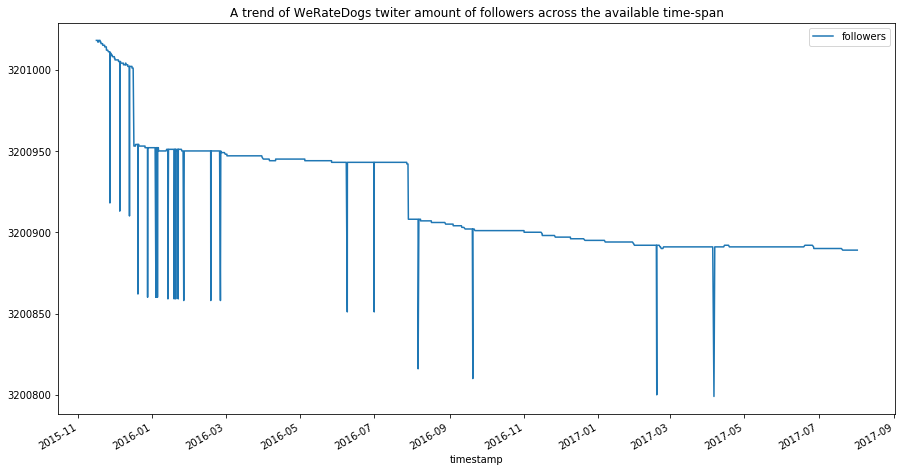

In [59]:
graph = global_df[['timestamp','followers']].plot('timestamp', figsize=(15,8))
plt.title('A trend of WeRateDogs twiter amount of followers across the available time-span');
fig1 = graph.get_figure()
fig1.savefig('timeplot.png')


A decline in amount of followers is noticed over the years

### What stage of dog was more common?

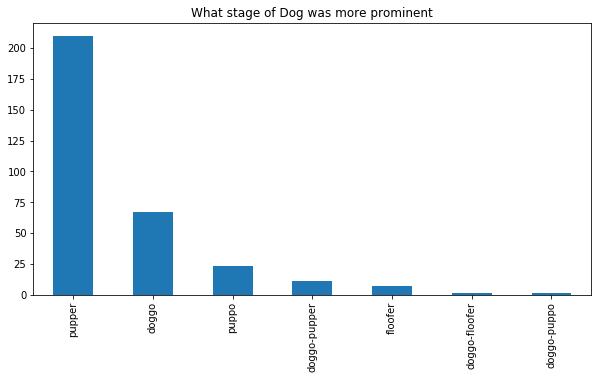

In [60]:

graph1 = global_df[global_df['dog_stages'] != 'None']['dog_stages'].value_counts().plot(kind='bar', color = base_color, figsize=(10,5));
plt.title('What stage of Dog was more prominent');
fig2 = graph1.get_figure()
fig2.savefig('stageplot.png')


The pupper stage of dog was the most prominent 

In [61]:
true_1st = global_df[global_df['1st_Prediction_dog'] == True]
true_2nd = global_df[global_df['2nd_Prediction_dog'] == True]
true_3rd = global_df[global_df['3rd_Prediction_dog'] == True]

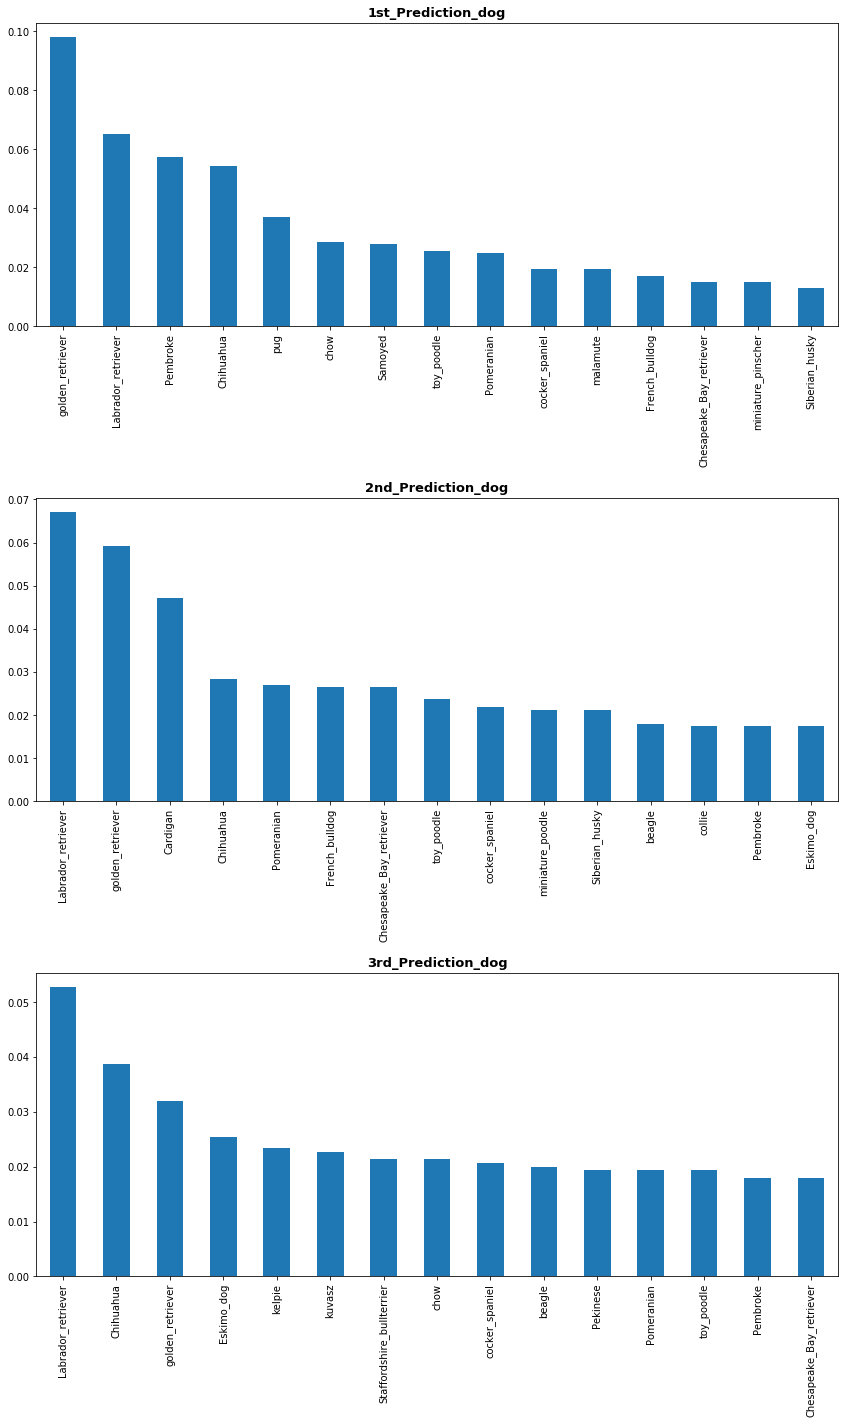

In [62]:
predictions = ['1st_Prediction_dog','2nd_Prediction_dog', '3rd_Prediction_dog']
breeds = ['1st_Prediction','2nd_Prediction','3rd_Prediction']
figu = plt.figure(figsize = [12, 20])
i=1

for j in predictions:
    plt.subplot(int(str(31)+str(i)))
    df = global_df[global_df[j] == True]
    df[breeds[i-1]].value_counts(normalize= True)[:15].plot.bar(color = base_color);
    plt.title(j, fontweight="bold", fontsize = 13.0)
    i+=1
    
figu.tight_layout(pad= 1.5);
figu.savefig('breedplot.png')


from the above set of plots, we can say that labrador_retriever and golden retriever are very good looking dog breed as they are prominent in the amount of appearnce in the top 3

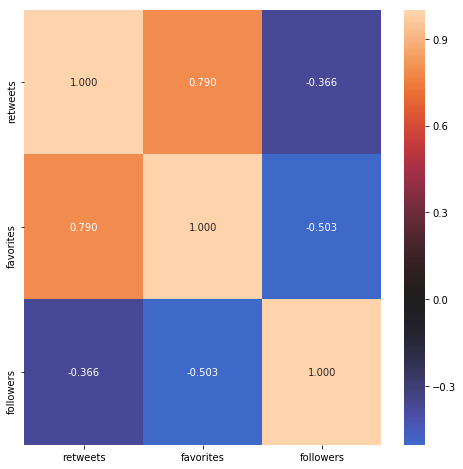

In [63]:
numeric_variable = ['retweets', 'favorites', 'followers']
plt.figure(figsize=[8,8])
graph3 = sb.heatmap(global_df[numeric_variable].corr(), annot = True, fmt = '.3f',
            center = 0);
fig4 = graph3.get_figure()
fig4.savefig('heatmapplot.png')


From the above heatmap, the following wa deduced;

favorites and retweets have a strong positive correation, therefore the more pople retweet the tweet the more likes we are likely to get

followers is negatively correlated to both favourites and retweets, although favourites has a more negative correlation than retweet